## Mitsuba Disk Experiment 1

In [44]:
import mitsuba              as mi
import matplotlib.pyplot    as plt
mi.variants() # mi.set_variant("llvm_ad_rgb") # mi.set_variant("scalar_rgb") # mi.set_variant("cuda_ad_rgb")
mi.set_variant("llvm_ad_rgb")

In [90]:
bunny = mi.load_dict({
    "type": "obj",
    "filename": "../scenes/meshes/p1-Sphere.obj",
    "face_normals": False,
    "to_world": mi.ScalarTransform4f.scale(0.01),
})

print(bunny)

OBJMesh[
  name = "p1-Sphere.obj",
  bbox = BoundingBox3f[
    min = [-0.499845, 0, -0.5],
    max = [0.499845, 0.499695, 0.5]
  ],
  vertex_count = 12492,
  vertices = [293 KiB of vertex data],
  face_count = 4164,
  faces = [48.8 KiB of face data],
  face_normals = 0
]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..5.8864713].


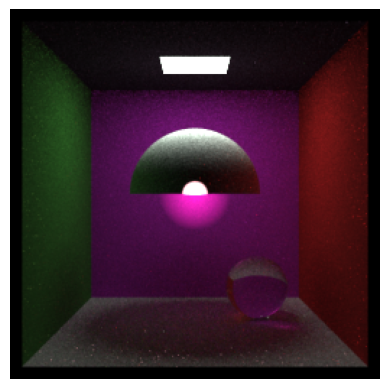

In [91]:
scene   = mi.load_file("../scenes/spherebox.xml")
img1    = mi.render(scene, spp=128)
plt.axis("off")
plt.imshow(img1 ** (1.0 / 1.7))

## Updating the scene

In this example, the color of the emitter is updated.

SceneParameters[
  -------------------------------------------------------------------------------------------
  Name                                    Flags    Type        Parent
  -------------------------------------------------------------------------------------------
  sensor.near_clip                                 float       PerspectiveCamera
  sensor.far_clip                                  float       PerspectiveCamera
  sensor.shutter_open                              float       PerspectiveCamera
  sensor.shutter_open_time                         float       PerspectiveCamera
  sensor.film.size                                 Vector2u    HDRFilm
  sensor.film.crop_size                            Vector2u    HDRFilm
  sensor.film.crop_offset                          Point2u     HDRFilm
  sensor.x_fov                            ∂, D     float       PerspectiveCamera
  sensor.principal_point_offset_x         ∂, D     float       PerspectiveCamera
  sensor.principal_point_o

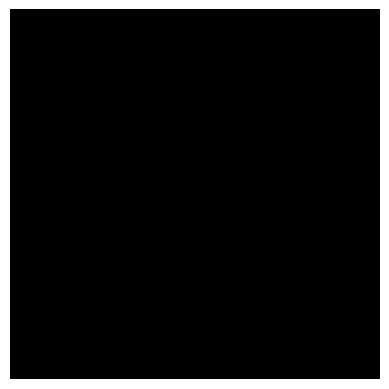

In [17]:
scene  = mi.load_file("../scenes/spherebox.xml")
params = mi.traverse(scene)
print(params)
print(params["spot.intensity.value"])

params["spot.intensity.value"] = [5.0 ,5.0 , 15.0]

params.update()
img1    = mi.render(scene, spp=128)
plt.axis("off")
plt.imshow(img1 ** (1.0 / 1.7))

#print(scene.emitters())



# print(em.intensity)
# print(em.to_world)
def dump(obj):
  for attr in dir(obj):
    print("obj.%s = %r" % (attr, getattr(obj, attr)))

